In [1]:
# Google drive 로딩
from google.colab import drive
drive.mount('/content/gdrive') # google drive 전체를 VM 환경에 mount 시킨다.(경로 -> /content/gdrive)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
# cuda 사용을 위해 cuDNN을 colab 환경에 설치(내 구글 드라이브에 있는 cudnn-10.0-linux-x64-v7.5.0.56.tgz 파일을 압축해제 한다.)
!tar -xzvf gdrive/My\ Drive/darknet/cuDNN/cudnn-10.0-linux-x64-v7.5.0.56.tgz -C /usr/local/
!chmod a+r /usr/local/cuda/include/cudnn.h # cudnn.h 파일에 대해 사용권한 부여

cuda/include/cudnn.h
cuda/NVIDIA_SLA_cuDNN_Support.txt
cuda/lib64/libcudnn.so
cuda/lib64/libcudnn.so.7
cuda/lib64/libcudnn.so.7.5.0
cuda/lib64/libcudnn_static.a


In [0]:
# Google Drive에 존재하는 darknet 디렉토리를 VM 환경에 복사 (경로 - /content/darknet)
!cp -r /content/gdrive/My\ Drive/darknet/bin/darknet /content/darknet

In [0]:
# Darknet 실행파일에 대한 권한 부여
!chmod +x /content/darknet/darknet # darknet 폴더안의 darknet 실행파일에 대한 권한 변경

In [0]:
# 처음 할당되는 가중치값을 세팅 하기 위해 다운로드
# 만약 처음부터 training하고 싶지 않은 경우 주석처리 한다.
!wget -P /content/darknet/ https://pjreddie.com/media/files/darknet53.conv.74

--2019-12-08 11:48:14--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘/content/darknet/darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M   104MB/s    in 1.5s    

2019-12-08 11:48:16 (104 MB/s) - ‘/content/darknet/darknet53.conv.74’ saved [162482580/162482580]



In [8]:
# darknet 폴더로 이동
%cd darknet

/content/darknet


In [17]:
# 학습 시작
# 만약 가중치 초기값을 바꾸고 싶다면 darknet53.conv.74 부분을 변경한다.
# !./darknet detector train data/obj.data cfg/yolo-obj.cfg darknet53.conv.74 -dont_show
!./darknet detector train data/obj.data cfg/yolo-obj.cfg backup/yolo-obj_last.weights -dont_show

yolo-obj
layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32 0.639 BF
   1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64 3.407 BF
   2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32 0.379 BF
   3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64 3.407 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128 3.407 BF
   6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64 0.379 BF
   7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128 3.407 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64 0.379 BF
  10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128 3.407 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   152 x 152 x 128   ->    76 x  76 x 256 3.407 BF
  13 conv    128  1 x 1 / 1    76 x  76 x 256   ->    76 x  76 x 128 0.379 

In [0]:
# 학습한 가중치 파일을 google drive 에 카피 
# 가중치 파일의 이름을 바꿔서 사용하면 된다. yolo-obj_last.weights -> 바꾸고 싶은 이름

from os import path
from google.colab import drive

!cp /content/darknet/backup/yolo-obj_last.weights /content/gdrive/My\ Drive/yolo-obj_last.weights

In [31]:
# 훈련한 모델을 가지고 예측 
# 명렁어 - ./darknet detector test [.data 파일 경로] [.weights 파일 경로] [이미지 경로]
# !./darknet detector test data/obj.data cfg/yolo-obj.cfg backup/yolo-obj_last.weights data/obj/google_asahi3.png

Cannot load image data/labels/32_0.png
Cannot load image data/labels/33_0.png
Cannot load image data/labels/34_0.png
Cannot load image data/labels/35_0.png
Cannot load image data/labels/36_0.png
Cannot load image data/labels/37_0.png
Cannot load image data/labels/38_0.png
Cannot load image data/labels/39_0.png
Cannot load image data/labels/40_0.png
Cannot load image data/labels/41_0.png
Cannot load image data/labels/42_0.png
Cannot load image data/labels/43_0.png
Cannot load image data/labels/44_0.png
Cannot load image data/labels/45_0.png
Cannot load image data/labels/46_0.png
Cannot load image data/labels/47_0.png
Cannot load image data/labels/48_0.png
Cannot load image data/labels/49_0.png
Cannot load image data/labels/50_0.png
Cannot load image data/labels/51_0.png
Cannot load image data/labels/52_0.png
Cannot load image data/labels/53_0.png
Cannot load image data/labels/54_0.png
Cannot load image data/labels/55_0.png
Cannot load image data/labels/56_0.png
Cannot load image data/la

In [0]:
def display_image(file_path = '/content/darknet/predictions.jpg'):
    import cv2
    import matplotlib.pyplot as plt
    import os.path

    if os.path.exists(file_path):
      img = cv2.imread(file_path)
      show_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
      plt.imshow(show_img)
    else:
      print('failed to open file')

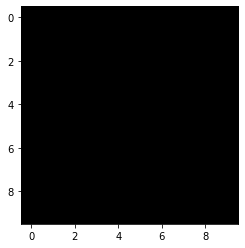

In [33]:
display_image()